In [1]:
from thllib import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
from thllib import util
import figurefirst as fifi
import scipy.signal
import local_project_functions as lpf
from IPython.display import SVG,display

In [11]:
%matplotlib inline

In [2]:
import networkx as nx

In [3]:
flynumbers = list(range(1389,1402))
flylist = [flb.NetFly(fnum,rootpath='/media/imager/FlyDataD/FlyDB/') for fnum in flynumbers]
#l = [fly.open_signals() for fly in flylist]
fly = flylist[4]
fly.open_signals()

In [8]:
sorted_keys = sorted(fly.spikestates.keys())

cull_list = [('left', 'bkg'),('right', 'bkg'),
            ('left', 'iii1'),('right', 'iii1'),
            ('left', 'iii24'),('right', 'iii24'),
            ('left', 'hg2'),('right', 'hg2'),
            ('left', 'hg3'),('right', 'hg3'),
            ('left', 'hg4'),('right', 'hg4'),
            ('left', 'nm'),('right', 'nm'),
            ('left', 'pr'),('right', 'pr'),
            ('left', 'tpd'),('right', 'tpd')]

for cull in cull_list:
    sorted_keys.remove(cull)
#[sorted_keys.remove(cull) for cull in cull_list]


state_mtrx = np.vstack([fly.spikestates[key] for key in sorted_keys])


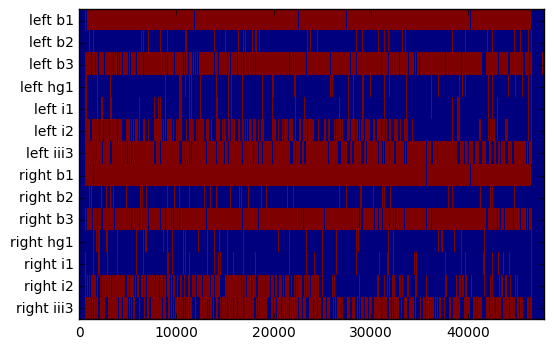

In [14]:
plt.imshow(state_mtrx,aspect = 'auto',interpolation = 'nearest')
plt.gca().set_yticks(range(14))
lbs = plt.gca().set_yticklabels(['%s %s'%k for k in sorted_keys])

In [224]:
b3_on_off = np.argwhere( (np.diff(state_mtrx[2,:]) == 1) & 
                      (np.diff(state_mtrx[-1,:]) == 1))

In [310]:
i1_off_on = np.argwhere((np.diff(state_mtrx[4,:]) == 1))

In [311]:
idx_sts = [np.arange(x-20,x+100) for x in i1_off_on[20:-20]]

In [316]:
idx_sts_fil = [idx_st for idx_st in idx_sts if (np.sum(state_mtrx[4,idx_st[0:21]]) == 0)]# &
                                               #(np.sum(state_mtrx[4,idx_st[21:25]]) == 4)]

In [317]:
kine = np.array(fly.left_amp) - np.array(fly.right_amp)

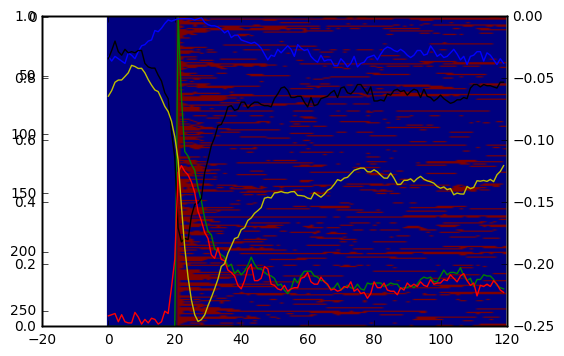

In [318]:
plt.imshow([state_mtrx[4,idx] for idx in idx_sts_fil],aspect = 'auto')
plt.twinx()

i1_mean = np.mean([state_mtrx[4,idx] for idx in idx_sts_fil],axis = 0)
hg1_mean = np.mean([state_mtrx[3,idx] for idx in idx_sts_fil],axis = 0)
b3_mean = np.mean([state_mtrx[2,idx] for idx in idx_sts_fil],axis = 0)
iii3_mean = np.mean([state_mtrx[6,idx] for idx in idx_sts_fil],axis = 0)

plt.plot(i1_mean,color = 'g')
plt.plot(b3_mean,color = 'b')
plt.plot(iii3_mean,color = 'k')
plt.plot(hg1_mean,color = 'r')
plt.twinx()
plt.plot(np.nanmean([kine[idx] for idx in idx_sts_fil],axis = 0),color = 'y')